In [21]:
# Import required libraries
import autokeras as ak
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
from PIL import Image
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
trials = 3

input_node = ak.ImageInput()
output_node = ak.Normalization(input_node)
output_node = ak.ConvBlock(output_node)
output_node = ak.ClassificationHead(output_node)

model = ak.AutoModel(inputs=input_node, outputs=output_node, overwrite=True, max_trials=trials)

In [5]:
format = '.jpg'

def listfiles(path, format=format):
    list_files = []
    print(path)
    for root, dirs, files in os.walk(path, topdown=False):
        for name in files:
            if name.endswith(format):
                fullname = os.path.join(root, name)
                list_files.append(fullname)
    return list_files

In [15]:
train_cats = listfiles('afhq/train/cat')
print(len(train_cats))
train_dogs = listfiles('afhq/train/dog')
print(len(train_dogs))
train_wild = listfiles('afhq/train/wild')
print(len(train_wild))

val_cats = listfiles('afhq/val/cat')
print(len(val_cats))
val_dogs = listfiles('afhq/val/dog')
print(len(val_dogs))
val_wild = listfiles('afhq/val/wild')
print(len(val_wild))

df_train = pd.DataFrame(columns=['image','label'])
df_val = pd.DataFrame(columns=['image','label'])

i = 0
for file in train_cats:
    df_train.loc[len(df_train.index)] = [np.asarray(Image.open(file)), 'cat']
    i += 1
    if i % 100 == 0:
        print(f'Processed {i} images in train_cats')

for file in train_dogs:
    df_train.loc[len(df_train.index)] = [np.asarray(Image.open(file)), 'dog']
    i += 1
    if i % 100 == 0:
        print(f'Processed {i} images in train_dogs')

for file in train_wild:
    df_train.loc[len(df_train.index)] = [np.asarray(Image.open(file)), 'wild']
    i += 1
    if i % 100 == 0:
        print(f'Processed {i} images in train_wild')

df_train.to_csv('faces_train.csv')

for file in val_cats:
    df_val.loc[len(df_val.index)] = [np.asarray(Image.open(file)), 'cat']
    i += 1
    if i % 100 == 0:
        print(f'Processed {i} images in val_cats')

for file in val_dogs:
    df_val.loc[len(df_val.index)] = [np.asarray(Image.open(file)), 'dog']
    i += 1
    if i % 100 == 0:
        print(f'Processed {i} images in val_dogs')

for file in val_wild:
    df_val.loc[len(df_val.index)] = [np.asarray(Image.open(file)), 'wild']
    i += 1
    if i % 100 == 0:
        print(f'Processed {i} images in val_wild')

df_val.to_csv('faces_val.csv')

afhq/train/cat
5153
afhq/train/dog
4739
afhq/train/wild
4738
afhq/val/cat
500
afhq/val/dog
500
afhq/val/wild
500
Processed 100 images in train_cats
Processed 200 images in train_cats
Processed 300 images in train_cats
Processed 400 images in train_cats
Processed 500 images in train_cats
Processed 600 images in train_cats
Processed 700 images in train_cats
Processed 800 images in train_cats
Processed 900 images in train_cats
Processed 1000 images in train_cats
Processed 1100 images in train_cats
Processed 1200 images in train_cats
Processed 1300 images in train_cats
Processed 1400 images in train_cats
Processed 1500 images in train_cats
Processed 1600 images in train_cats
Processed 1700 images in train_cats
Processed 1800 images in train_cats
Processed 1900 images in train_cats
Processed 2000 images in train_cats
Processed 2100 images in train_cats
Processed 2200 images in train_cats
Processed 2300 images in train_cats
Processed 2400 images in train_cats
Processed 2500 images in train_c

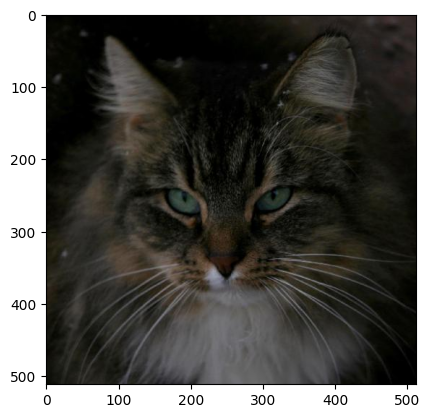

In [25]:
plt.imshow(df_train.loc[0]['image'])

In [29]:
x = df_train['image']
y = df_train['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

10430    wild
553       cat
9930     wild
4869      cat
13290    wild
         ... 
12680    wild
9187      dog
5804      dog
1112      cat
3916      cat
Name: label, Length: 2926, dtype: object